In [117]:
import pandas as pd
import numpy as np
import geopandas as gp
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from multiprocessing import Pool
from haversine import haversine
from textwrap import wrap
import os.path
import json
import pickle
import zipfile
import seaborn as sns
from functools import partial
import matplotlib.collections as mcoll
import matplotlib.path as mpath
# import contextily as ctx
import csv

from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter 

In [118]:
datadir_nyc = 'datasets/NYC/mobility/'
datadir2_nyc = 'datasets2/NYC/mobility/'
mapdir_nyc = 'datasets/NYC/map/'

In [119]:
datadir_chicago = 'datasets/Chicago/mobility/'
datadir2_chicago = 'datasets2/Chicago/mobility/'
mapdir_chicago = 'datasets/Chicago/map/'

# NYC Data Processing

In [120]:
# read all data, get npy

In [121]:
background = gp.read_file(mapdir_nyc+"taxi_zones_wgs84.shp")

In [ ]:
# # # Process bikesharing data
# start_at = []
# end_at = []
# start_station_id = []
# end_station_id = []
# start_lat = []
# start_lng = []
# end_lat = []
# end_lng = []

# year = 2021
# months = ['01','02','03','04','05','06','07']
# for month in months:
#     zf = zipfile.ZipFile(datadir_nyc+str(year)+str(month)+'-citibike-tripdata.csv.zip')
#     bikesharing = pd.read_csv(zf.open(str(year)+str(month)+'-citibike-tripdata.csv'))
#     if('starttime' in bikesharing.columns):
#         start_at += bikesharing['starttime'].to_list()
#         end_at += bikesharing['stoptime'].to_list()
#         start_station_id += bikesharing['start station id'].to_list()
#         end_station_id += bikesharing['end station id'].to_list()
#         start_lat += bikesharing['start station latitude'].to_list()
#         start_lng += bikesharing['start station longitude'].to_list()
#         end_lat += bikesharing['end station latitude'].to_list()
#         end_lng += bikesharing['end station longitude'].to_list()
#     else:
#         start_at += bikesharing['started_at'].to_list()
#         end_at += bikesharing['ended_at'].to_list()
#         start_station_id += bikesharing['start_station_id'].to_list()
#         end_station_id += bikesharing['end_station_id'].to_list()
#         start_lat += bikesharing['start_lat'].to_list()
#         start_lng += bikesharing['start_lng'].to_list()
#         end_lat += bikesharing['end_lat'].to_list()
#         end_lng += bikesharing['end_lng'].to_list()

# bikesharing = pd.DataFrame({'start_at': start_at, 'end_at': end_at,
#                             'start_station_id': start_station_id,
#                             'end_station_id': end_station_id,
#                            'start_lat': start_lat, 'start_lng': start_lng,
#                            'end_lat': end_lat, 'end_lng': end_lng})
# bikesharing.to_csv(datadir_nyc+"bikesharing_2021.csv", index= None)

# station_coord = bikesharing[(bikesharing['start_lat']!=-1) & (bikesharing['start_station_id']!='')][['start_lat', 'start_lng', 'start_station_id']]

# station_coord.append(bikesharing[(bikesharing['end_lat']!=-1) & (bikesharing['end_station_id']!='')][['end_lat', 'end_lng', 'end_station_id']].rename({
#     'end_lat': 'start_lat', 'end_lng': 'start_lng', 'end_station_id': 'start_station_id'
# }))

# station_list = station_coord.groupby(['start_station_id']).agg({'start_lng':np.mean, 'start_lat': np.mean}).reset_index()

# station_list = gp.GeoDataFrame(station_list, geometry = gp.points_from_xy(station_list.start_lng, station_list.start_lat),crs = 'EPSG:4326')

# station_zone = gp.sjoin(station_list, background, how='left', op='within')

# station_zone[['start_station_id','LocationID']].to_csv(mapdir_nyc+"station_zone_2021.csv", index=None)

In [123]:
# bikesharing = pd.read_csv(datadir_nyc+'bikesharing_2021.csv')
# station_zone = pd.read_csv(mapdir_nyc+'station_zone_2021.csv')

# # create a dict based on station_zone
# station_dict = {}
# for _, row in station_zone.iterrows():
#     station_dict[str(row['start_station_id'])] = row['LocationID']

# bikesharing['start_time'] = pd.to_datetime(bikesharing['start_at'])
# bikesharing['end_time'] = pd.to_datetime(bikesharing['end_at'])

# start_times = []
# years = []
# days = []
# durations = []
# start_zone_ids = []
# end_zone_ids = []

# to_start_lng = []
# to_start_lat = []
# to_end_lng = []
# to_end_lat = []

# error = 0
# for _, row in bikesharing.iterrows():
#     valid = True
#     if(row['start_lat'] == -1):
#         if(str(row['start_station_id']) in station_dict):
#             start_zone_id = station_dict[str(row['start_station_id'])]
#         else:
#             valid = False
#     else:
#         start_zone_id = -1
#     if(row['end_lat'] == -1):
#         if(str(row['end_station_id']) in station_dict):
#             end_zone_id = station_dict[str(row['end_station_id'])]
#         else:
#             valid = False
#     else:
#         end_zone_id = -1
        
#     if valid:
#         start_time = row['start_at']
#         year = row['start_time'].year
#         day = row['start_time'].dayofyear
#         duration = (row['end_time'] - row['start_time']).total_seconds()
#         start_times.append(start_time)
#         years.append(year)
#         days.append(day)
#         durations.append(duration)
#         start_zone_ids.append(start_zone_id)
#         end_zone_ids.append(end_zone_id)
#         if start_zone_id == -1:
#             to_start_lng.append(row['start_lng'])
#             to_start_lat.append(row['start_lat'])
#         if end_zone_id == -1:
#             to_end_lng.append(row['end_lng'])
#             to_end_lat.append(row['end_lat'])
#     else:
#         error+=1  

# df_bikesharing = pd.DataFrame({'start_time': start_times, 'year': years, 'day': days, 'duration': durations,
#                               'start_zone_id': start_zone_ids, 'end_zone_id': end_zone_ids})
# print(error)

In [10]:
# df_bikesharing.to_csv(datadir_nyc+"bikesharing_mid_2021.csv", index=None)
# df_to_start = pd.DataFrame({'start_lng': to_start_lng, 'start_lat': to_start_lat})
# df_to_start.to_csv(datadir_nyc+"bikesharing_start_2021.csv", index=None)
# df_to_end = pd.DataFrame({'end_lng': to_end_lng, 'end_lat': to_end_lat})
# df_to_end.to_csv(datadir_nyc+"bikesharing_end_2021.csv", index=None)

df_bikesharing=pd.read_csv(datadir_nyc+"bikesharing_mid_2021.csv")
df_to_start = pd.read_csv(datadir_nyc+"bikesharing_start_2021.csv")
df_to_end = pd.read_csv(datadir_nyc+"bikesharing_end_2021.csv",)

df_to_start = gp.GeoDataFrame(df_to_start, geometry = gp.points_from_xy(df_to_start.start_lng, df_to_start.start_lat),crs = 'EPSG:4326')
df_to_end = gp.GeoDataFrame(df_to_end, geometry = gp.points_from_xy(df_to_end.end_lng, df_to_end.end_lat),crs = 'EPSG:4326')

df_to_start = gp.sjoin(df_to_start,background, how='left', op='within')
df_to_end = gp.sjoin(df_to_end,background, how='left', op='within')

df_bikesharing.loc[df_bikesharing['start_zone_id']==-1, 'start_zone_id'] = df_to_start['LocationID']
df_bikesharing.loc[df_bikesharing['end_zone_id']==-1, 'end_zone_id'] = df_to_end['LocationID']

df_bikesharing.to_csv(datadir_nyc + "bikesharing_combined_2021.csv")

/home/lei67/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/home/lei67/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
df_bikesharing = pd.read_csv(datadir_nyc +"bikesharing_combined_2021.csv")

In [33]:
# # Load mobility data
licenses = ['yellow', 'green']
months = ['01','02','03','04','05','06','07']

df = []
year = '2021'

for license in licenses:
    for month in months:
        if(len(df) ==0):
            df = pd.read_csv(datadir2_nyc+license+'_tripdata_'+year+'-'+month+'.csv').rename(columns={'tpep_pickup_datetime':'lpep_pickup_datetime'})
        else:
            df = df.append(pd.read_csv(datadir2_nyc+license+'_tripdata_'+year+'-'+month+'.csv').rename(columns={'tpep_pickup_datetime':'lpep_pickup_datetime'}))
df_taxi = df[['lpep_pickup_datetime','PULocationID','DOLocationID']]

licenses = ['fhvhv','fhv']
df = []
year = '2021'

for license in licenses:
    for month in months:
        if(len(df) ==0):
            df = pd.read_csv(datadir2_nyc+license+'_tripdata_'+year+'-'+month+'.csv')
        else:
            df = df.append(pd.read_csv(datadir2_nyc+license+'_tripdata_'+year+'-'+month+'.csv'))
df_fhv = df[['pickup_datetime','PULocationID','DOLocationID']]

/home/lei67/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/lei67/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
df_fhv['timestamp'] = pd.to_datetime(df_fhv['pickup_datetime'], errors = 'coerce')
df_fhv['year'] = df_fhv['timestamp'].dt.year
df_fhv['day'] = df_fhv['timestamp'].dt.dayofyear
df_fhv = df_fhv.rename(columns={'PULocationID':'pickup_loc', 'DOLocationID':'dropoff_loc','pickup_datetime':'starttime'})

df_taxi['timestamp'] = pd.to_datetime(df_taxi['lpep_pickup_datetime'], errors = 'coerce')
df_taxi['year'] = df_taxi['timestamp'].dt.year
df_taxi['day'] = df_taxi['timestamp'].dt.dayofyear
df_taxi = df_taxi.rename(columns={'PULocationID':'pickup_loc', 'DOLocationID':'dropoff_loc','lpep_pickup_datetime':'starttime'})

<ipython-input-34-e7a7a206fd74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fhv['timestamp'] = pd.to_datetime(df_fhv['pickup_datetime'], errors = 'coerce')
<ipython-input-34-e7a7a206fd74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fhv['year'] = df_fhv['timestamp'].dt.year
<ipython-input-34-e7a7a206fd74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [35]:
# get npy
# Load mobility data
years = np.arange(2021, 2022)

df_taxi_agg = df_taxi.groupby(['year','day','pickup_loc'])['starttime'].count().reset_index()
df_fhv_agg = df_fhv.groupby(['year','day','pickup_loc'])['starttime'].count().reset_index()
df_bikesharing_agg = df_bikesharing.groupby(['year','day','start_zone_id'])['start_time'].count().reset_index()

for year in years:    
    df_taxi_tmp = df_taxi_agg[df_taxi_agg['year']==year]
    df_fhv_tmp = df_fhv_agg[df_fhv_agg['year']==year]
    df_bikesharing_tmp = df_bikesharing_agg[df_bikesharing_agg['year']==year]
    
    if(int(year)%4 == 0):
        max_day = 366
    else:
        max_day = 365
        
    pickup_mat = np.zeros([3, max_day, 1+263])
    for _,row in df_taxi_tmp.iterrows():
        if(int(row['pickup_loc'])<264 and int(row['pickup_loc'])>0 and int(row['day']-1)<max_day):
            pickup_mat[0, int(row['day']-1), 0] += row['starttime']
            pickup_mat[0, int(row['day']-1), int(row['pickup_loc'])] = row['starttime']

    for _,row in df_fhv_tmp.iterrows():
        if(int(row['pickup_loc'])<264 and int(row['pickup_loc'])>0 and int(row['day']-1)<max_day):
            pickup_mat[1, int(row['day']-1), 0] += row['starttime']
            pickup_mat[1, int(row['day']-1), int(row['pickup_loc'])] = row['starttime']

    for _,row in df_bikesharing_tmp.iterrows():
        if(int(row['start_zone_id'])<264 and int(row['start_zone_id'])>0 and int(row['day']-1)<max_day):
            pickup_mat[2, int(row['day']-1), 0] += row['start_time']
            pickup_mat[2, int(row['day']-1), int(row['start_zone_id'])] = row['start_time']

    np.save(datadir_nyc+'pickup_mat_'+str(year)+'.npy', pickup_mat)

In [36]:
# Load mobility data
years = np.arange(2021, 2022)

df_taxi_agg = df_taxi.groupby(['year','day','dropoff_loc'])['starttime'].count().reset_index()
df_fhv_agg = df_fhv.groupby(['year','day','dropoff_loc'])['starttime'].count().reset_index()
df_bikesharing_agg = df_bikesharing.groupby(['year','day','end_zone_id'])['start_time'].count().reset_index()

for year in years:    
    df_taxi_tmp = df_taxi_agg[df_taxi_agg['year']==year]
    df_fhv_tmp = df_fhv_agg[df_fhv_agg['year']==year]
    df_bikesharing_tmp = df_bikesharing_agg[df_bikesharing_agg['year']==year]
    
    if(int(year)%4 == 0):
        max_day = 366
    else:
        max_day = 365
        
    dropoff_mat = np.zeros([3, max_day, 1+263])
    for _,row in df_taxi_tmp.iterrows():
        if(int(row['dropoff_loc'])<264 and int(row['dropoff_loc'])>0 and int(row['day']-1)<max_day):
            dropoff_mat[0, int(row['day']-1), 0] += row['starttime']
            dropoff_mat[0, int(row['day']-1), int(row['dropoff_loc'])] = row['starttime']

    for _,row in df_fhv_tmp.iterrows():
        if(int(row['dropoff_loc'])<264 and int(row['dropoff_loc'])>0 and int(row['day']-1)<max_day):
            dropoff_mat[1, int(row['day']-1), 0] += row['starttime']
            dropoff_mat[1, int(row['day']-1), int(row['dropoff_loc'])] = row['starttime']

    for _,row in df_bikesharing_tmp.iterrows():
        if(int(row['end_zone_id'])<264 and int(row['end_zone_id'])>0 and int(row['day']-1)<max_day):
            dropoff_mat[2, int(row['day']-1), 0] += row['start_time']
            dropoff_mat[2, int(row['day']-1), int(row['end_zone_id'])] = row['start_time']

    np.save(datadir_nyc+'dropoff_mat_'+str(year)+'.npy', dropoff_mat)

In [40]:
# finally, get the data matrix
taxi_zone = gp.read_file(mapdir_nyc + "taxi_zones_wgs84.shp")
background =  gp.read_file(mapdir_nyc + "nyc_community.shp")
background['ID'] = background.index

taxi_zone['area'] = taxi_zone['geometry'].area/ (1609*1609)
taxi_zone.index = taxi_zone['OBJECTID']

auto_inter = gp.overlay(taxi_zone, background, how='intersection')
auto_inter['area'] = auto_inter['geometry'].area/ (1609*1609)
# auto_inter.index = taxi_zone['LocationID']

community_dict = {}
for i in range(len(background)):
    community_dict[i] = []
    
for _,row in auto_inter.iterrows():
    if(row['area']/taxi_zone.loc[row['OBJECTID'],'area']>0.5):
        community_dict[row['ID']].append(row['OBJECTID'])


# community_dict

pickup_mats = []
dropoff_mats = []

for year in range(2018,2022):
    pickup_mats.append(np.load(datadir_nyc+'pickup_mat_'+str(year)+'.npy'))
    dropoff_mats.append(np.load(datadir_nyc+'dropoff_mat_'+str(year)+'.npy'))

nyc_pickup_mat = np.concatenate(pickup_mats, axis = 1)
nyc_dropoff_mat = np.concatenate(dropoff_mats, axis = 1)

nyc_pickup = np.zeros((3, nyc_pickup_mat.shape[1], len(background)))
nyc_dropoff = np.zeros((3, nyc_dropoff_mat.shape[1], len(background)))

for i in range(len(background)):
    nyc_pickup[:,:,i] = np.sum(nyc_pickup_mat[:,:,community_dict[i]], axis=2)
    nyc_dropoff[:,:,i] = np.sum(nyc_dropoff_mat[:,:,community_dict[i]], axis=2)

nyc_pickup = np.concatenate([nyc_pickup[0,:,:], nyc_pickup[1,:,:],nyc_pickup[2,:,:]], axis = 1)
nyc_dropoff = np.concatenate([nyc_dropoff[0,:,:], nyc_dropoff[1,:,:],nyc_dropoff[2,:,:]], axis = 1)

# np.savetxt('chicago_pickup.csv', chicago_pickup, delimiter=',')
# np.savetxt('chicago_dropoff.csv', chicago_dropoff, delimiter=',')

np.savetxt('nyc_pickup.csv', nyc_pickup, delimiter=',')
np.savetxt('nyc_dropoff.csv', nyc_dropoff, delimiter=',')

<ipython-input-40-7cabc81b6cd7>:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi_zone['area'] = taxi_zone['geometry'].area/ (1609*1609)
<ipython-input-40-7cabc81b6cd7>:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  auto_inter['area'] = auto_inter['geometry'].area/ (1609*1609)


In [51]:
from types import SimpleNamespace

chicago = SimpleNamespace()

chicago.datadir = 'datasets/Chicago/mobility/'
chicago.socdir = 'datasets/Chicago/social/'
chicago.pandir = 'datasets/Chicago/pandemic/'
chicago.mapdir = 'datasets/Chicago/map/'

nyc = SimpleNamespace()

nyc.datadir = 'datasets/NYC/mobility/'
nyc.socdir = 'datasets/NYC/social/'
nyc.pandir = 'datasets/NYC/pandemic/'
nyc.mapdir = 'datasets/NYC/map/'

In [54]:
# prepare the case, vacc data
# Total number of cases
chicago_cases = pd.read_csv(chicago.pandir+'COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')
nyc_cases = pd.read_csv(nyc.pandir+'trends/data-by-day.csv')

chicago_cases = chicago_cases[['Date', 'Cases - Total']]
nyc_cases = nyc_cases[['date_of_interest', 'CASE_COUNT']]

day_indexes = pd.date_range('2018-01-01', '2021-12-31', freq='D').format(formatter=lambda x: x.strftime('%m/%d/%Y'))

chicago_daily_cases = np.zeros((len(day_indexes),1))
nyc_daily_cases = np.zeros((len(day_indexes),1))

for _, row in chicago_cases.iterrows():
    if(row['Date'] in day_indexes):
        chicago_daily_cases[day_indexes.index(row['Date'])] = row['Cases - Total']

for _, row in nyc_cases.iterrows():
    nyc_daily_cases[day_indexes.index(row['date_of_interest'])] = row['CASE_COUNT']

np.savetxt('nyc_daily_cases.csv', nyc_daily_cases, delimiter=',')
np.savetxt('chicago_daily_cases.csv', chicago_daily_cases, delimiter=',')

In [93]:
# prepare the case, vacc data
# Total number of cases
chicago_cases = pd.read_csv(chicago.pandir+'COVID-19_Daily_Vaccinations_Chicago_Residents.csv')
nyc_cases = pd.read_csv(nyc.pandir+'doses-by-day.csv')

chicago_cases = chicago_cases[['Date', 'Total Doses - Cumulative']]
nyc_cases = nyc_cases[['DATE', 'ADMIN_ALLDOSES_CUMULATIVE']]

day_indexes = pd.date_range('2018-01-01', '2021-12-31', freq='D').format(formatter=lambda x: x.strftime('%m/%d/%Y'))
day_indexes2 = pd.date_range('2018-01-01', '2021-12-31', freq='D').format(formatter=lambda x: x.strftime('%Y-%m-%d'))


chicago_daily_cases = np.zeros((len(day_indexes),1))
nyc_daily_cases = np.zeros((len(day_indexes2),1))

for _, row in chicago_cases.iterrows():
    if(row['Date'] in day_indexes):
        chicago_daily_cases[day_indexes.index(row['Date'])] = row['Total Doses - Cumulative']

for _, row in nyc_cases.iterrows():
    nyc_daily_cases[day_indexes2.index(row['DATE'])] = row['ADMIN_ALLDOSES_CUMULATIVE']

np.savetxt('nyc_total_doses.csv', nyc_daily_cases, delimiter=',')
np.savetxt('chicago_total_doses.csv', chicago_daily_cases, delimiter=',')

# Chicago Data processing

In [76]:
background = gp.read_file(mapdir_chicago+'community.shp')

In [77]:
# with open(datadir_chicago+"Taxi_Trips_2018.csv", 'r') as f:
#     my_reader = csv.reader(f)
#     i = 0
#     error = 0
#     current_year = -1
#     vid = []
#     year = []
#     timestamps = []
#     traveltime = []
#     pickup_loc = []
#     dropoff_loc = []
#     count = 0
#     for fields in my_reader:
#         count+=1
#         if((count+1) % 1000000==0):
#             print("Dealing with " + str(count+1))
#         if(i>0):
#             # keep pickup year, pickup day, pickup comm, dropoff comm
#             if(len(fields)<23):
#                 error +=1
#             elif(fields[2] == ''):
#                 error += 1
#             else:
#                 vid.append(fields[1])
#                 year.append(int(fields[2].split("/")[2][:4]))
#                 timestamps.append(fields[2])
#                 if(fields[4] == ''):
#                     traveltime.append(-1)
#                 else:
#                     traveltime.append(int(fields[4]))
#                 if(fields[8] == ''):
#                     pickup_loc.append(-1)
#                 else:
#                     pickup_loc.append(int(fields[8]))
#                 if(fields[9] == ''):
#                     dropoff_loc.append(-1)
#                 else:
#                     dropoff_loc.append(int(fields[9]))
#         i+=1
#     df = pd.DataFrame({"year":year,
#                        "vid":vid,
#                        "starttime":timestamps,
#                       "traveltime":traveltime,
#                       "pickup_loc":pickup_loc,
#                       "dropoff_loc":dropoff_loc}).to_csv(datadir_chicago+"taxi_trip_2018.csv")
#     print("Total trips:{0}, errors:{1}".format(i, error))

In [78]:
# with open(datadir_chicago+"Taxi_Trips_2019.csv", 'r') as f:
#     my_reader = csv.reader(f)
#     i = 0
#     error = 0
#     current_year = -1
#     vid = []
#     year = []
#     timestamps = []
#     traveltime = []
#     pickup_loc = []
#     dropoff_loc = []
#     for fields in my_reader:
#         if(i>0):
#             # keep pickup year, pickup day, pickup comm, dropoff comm
#             if(len(fields)<23):
#                 error +=1
#             elif(fields[2] == ''):
#                 error += 1
#             else:
#                 vid.append(fields[1])
#                 year.append(int(fields[2].split("/")[2][:4]))
#                 timestamps.append(fields[2])
#                 if(fields[4] == ''):
#                     traveltime.append(-1)
#                 else:
#                     traveltime.append(int(fields[4]))
#                 if(fields[8] == ''):
#                     pickup_loc.append(-1)
#                 else:
#                     pickup_loc.append(int(fields[8]))
#                 if(fields[9] == ''):
#                     dropoff_loc.append(-1)
#                 else:
#                     dropoff_loc.append(int(fields[9]))
#         i+=1
#     df = pd.DataFrame({"year":year,
#                        "vid":vid,
#                        "starttime":timestamps,
#                       "traveltime":traveltime,
#                       "pickup_loc":pickup_loc,
#                       "dropoff_loc":dropoff_loc}).to_csv(datadir_chicago+"taxi_trip_2019.csv")
#     print("Total trips:{0}, errors:{1}".format(i, error))

In [79]:
# with open(datadir_chicago+"Taxi_Trips_2020.csv", 'r') as f:
#     my_reader = csv.reader(f)
#     i = 0
#     error = 0
#     current_year = -1
#     vid = []
#     year = []
#     timestamps = []
#     traveltime = []
#     pickup_loc = []
#     dropoff_loc = []
#     for fields in my_reader:
#         if(i>0):
#             # keep pickup year, pickup day, pickup comm, dropoff comm
#             if(len(fields)<23):
#                 error +=1
#             elif(fields[2] == ''):
#                 error += 1
#             else:
#                 vid.append(fields[1])
#                 year.append(int(fields[2].split("/")[2][:4]))
#                 timestamps.append(fields[2])
#                 if(fields[4] == ''):
#                     traveltime.append(-1)
#                 else:
#                     traveltime.append(int(fields[4]))
#                 if(fields[8] == ''):
#                     pickup_loc.append(-1)
#                 else:
#                     pickup_loc.append(int(fields[8]))
#                 if(fields[9] == ''):
#                     dropoff_loc.append(-1)
#                 else:
#                     dropoff_loc.append(int(fields[9]))
#         i+=1
#     df = pd.DataFrame({"year":year,
#                        "vid":vid,
#                        "starttime":timestamps,
#                       "traveltime":traveltime,
#                       "pickup_loc":pickup_loc,
#                       "dropoff_loc":dropoff_loc}).to_csv(datadir_chicago+"taxi_trip_2020.csv")
#     print("Total trips:{0}, errors:{1}".format(i, error))

In [80]:
# with open(datadir2_chicago+"Taxi_Trips.csv", 'r') as f:
#     my_reader = csv.reader(f)
#     i = 0
#     error = 0
#     current_year = -1
#     vid = []
#     year = []
#     timestamps = []
#     traveltime = []
#     pickup_loc = []
#     dropoff_loc = []
#     for fields in my_reader:
#         if(i>0):
#             # keep pickup year, pickup day, pickup comm, dropoff comm
#             if(len(fields)<23):
#                 error +=1
#             elif(fields[2] == ''):
#                 error += 1
#             else:
#                 if(int(fields[2].split("/")[2][:4])==2021):
#                     vid.append(fields[1])
#                     year.append(int(fields[2].split("/")[2][:4]))
#                     timestamps.append(fields[2])
#                     if(fields[4] == ''):
#                         traveltime.append(-1)
#                     else:
#                         traveltime.append(int(fields[4]))
#                     if(fields[8] == ''):
#                         pickup_loc.append(-1)
#                     else:
#                         pickup_loc.append(int(fields[8]))
#                     if(fields[9] == ''):
#                         dropoff_loc.append(-1)
#                     else:
#                         dropoff_loc.append(int(fields[9]))
#         i+=1
#     df = pd.DataFrame({"year":year,
#                        "vid":vid,
#                        "starttime":timestamps,
#                       "traveltime":traveltime,
#                       "pickup_loc":pickup_loc,
#                       "dropoff_loc":dropoff_loc}).to_csv(datadir2_chicago+"taxi_trip_2021.csv")
#     print("Total trips:{0}, errors:{1}".format(i, error))

In [11]:
with open(datadir2_chicago+"Transportation_Network_Providers_-_Trips_-_2021.csv", 'r') as f:
    my_reader = csv.reader(f)
    i = 0
    error = 0
    current_year = -1
    vid = []
    year = []
    timestamps = []
    traveltime = []
    pickup_loc = []
    dropoff_loc = []
    count = 0
    for fields in my_reader:
        count+=1
        if((count+1) % 1000000==0):
            print("Dealing with " + str(count+1))
            print(fields[1])
        if(i>0):
            # keep pickup year, pickup day, pickup comm, dropoff comm
            if(len(fields)<21):
                error += 1
            elif(fields[1] == ''):
                error += 1
            else:
#                 vid.append(fields[1])
                year.append(int(fields[1].split("/")[1][:4]))
                timestamps.append(fields[1])
                if(fields[3] == ''):
                    traveltime.append(-1)
                else:
                    traveltime.append(int(fields[3]))
                if(fields[7] == ''):
                    pickup_loc.append(-1)
                else:
                    pickup_loc.append(int(fields[7]))
                if(fields[8] == ''):
                    dropoff_loc.append(-1)
                else:
                    dropoff_loc.append(int(fields[8]))
        i+=1
    df = pd.DataFrame({"year":year,
                       "starttime":timestamps,
                      "traveltime":traveltime,
                      "pickup_loc":pickup_loc,
                      "dropoff_loc":dropoff_loc}).to_csv(datadir2_chicago+"fhv_trip_2021.csv")
    print("Total trips:{0}, errors:{1}".format(i, error))

Dealing with 1000000
01/10/2021 04:30:00 PM
Dealing with 2000000
01/20/2021 07:15:00 AM
Dealing with 3000000
01/29/2021 12:30:00 AM
Dealing with 4000000
02/06/2021 02:00:00 PM
Dealing with 5000000
02/14/2021 07:30:00 PM
Dealing with 6000000
02/24/2021 10:00:00 AM
Dealing with 7000000
03/04/2021 03:00:00 PM
Dealing with 8000000
03/12/2021 03:00:00 PM
Dealing with 9000000
03/20/2021 01:15:00 AM
Dealing with 10000000
03/27/2021 08:00:00 PM
Dealing with 11000000
04/04/2021 06:30:00 PM
Dealing with 12000000
04/12/2021 04:45:00 PM
Dealing with 13000000
04/20/2021 06:45:00 PM
Dealing with 14000000
04/28/2021 06:45:00 PM
Dealing with 15000000
05/06/2021 06:45:00 PM
Dealing with 16000000
05/14/2021 05:45:00 PM
Dealing with 17000000
05/22/2021 01:15:00 AM
Dealing with 18000000
05/29/2021 12:45:00 PM
Dealing with 19000000
06/05/2021 05:15:00 PM
Dealing with 20000000
06/12/2021 08:15:00 PM
Dealing with 21000000
06/19/2021 11:00:00 PM
Dealing with 22000000
06/27/2021 12:00:00 AM
Dealing with 230000

In [24]:
# # Process bikesharing data
start_at = []
end_at = []
start_station_id = []
end_station_id = []
start_lat = []
start_lng = []
end_lat = []
end_lng = []

year = 2021
months = ['01','02','03','04','05','06','07']
for month in months:
    zf = zipfile.ZipFile(datadir2_chicago+str(year)+str(month)+'-divvy-tripdata.zip')
    bikesharing = pd.read_csv(zf.open(str(year)+str(month)+'-divvy-tripdata.csv'))
    start_at += bikesharing['started_at'].to_list()
    end_at += bikesharing['ended_at'].to_list()
    start_station_id += bikesharing['start_station_id'].to_list()
    end_station_id += bikesharing['end_station_id'].to_list()
    start_lat += bikesharing['start_lat'].to_list()
    start_lng += bikesharing['start_lng'].to_list()
    end_lat += bikesharing['end_lat'].to_list()
    end_lng += bikesharing['end_lng'].to_list()

bikesharing = pd.DataFrame({'start_at': start_at, 'end_at': end_at,
                            'start_station_id': start_station_id,
                            'end_station_id': end_station_id,
                           'start_lat': start_lat, 'start_lng': start_lng,
                           'end_lat': end_lat, 'end_lng': end_lng})
bikesharing.to_csv(datadir2_chicago+"bikesharing_2021.csv", index= None)

station_coord = bikesharing[(bikesharing['start_lat']!=-1) & (bikesharing['start_station_id']!='')][['start_lat', 'start_lng', 'start_station_id']]

station_coord.append(bikesharing[(bikesharing['end_lat']!=-1) & (bikesharing['end_station_id']!='')][['end_lat', 'end_lng', 'end_station_id']].rename({
    'end_lat': 'start_lat', 'end_lng': 'start_lng', 'end_station_id': 'start_station_id'
}))

station_list = station_coord.groupby(['start_station_id']).agg({'start_lng':np.mean, 'start_lat': np.mean}).reset_index()

station_list = gp.GeoDataFrame(station_list, geometry = gp.points_from_xy(station_list.start_lng, station_list.start_lat),crs = 'EPSG:4326')

station_zone = gp.sjoin(station_list, background, how='left', op='within')

station_zone[['start_station_id','area_num_1']].to_csv(mapdir_chicago+"station_zone_2021.csv", index=None)

bikesharing = pd.read_csv(datadir2_chicago+'bikesharing_2021.csv')
station_zone = pd.read_csv(mapdir_chicago+'station_zone_2021.csv')

# create a dict based on station_zone
station_dict = {}
for _, row in station_zone.iterrows():
    station_dict[str(row['start_station_id'])] = row['area_num_1']

bikesharing['start_time'] = pd.to_datetime(bikesharing['start_at'])
bikesharing['end_time'] = pd.to_datetime(bikesharing['end_at'])

start_times = []
years = []
days = []
durations = []
start_zone_ids = []
end_zone_ids = []

to_start_lng = []
to_start_lat = []
to_end_lng = []
to_end_lat = []

error = 0
for _, row in bikesharing.iterrows():
    valid = True
    if(row['start_lat'] == -1):
        if(str(row['start_station_id']) in station_dict):
            start_zone_id = station_dict[str(row['start_station_id'])]
        else:
            valid = False
    else:
        start_zone_id = -1
    if(row['end_lat'] == -1):
        if(str(row['end_station_id']) in station_dict):
            end_zone_id = station_dict[str(row['end_station_id'])]
        else:
            valid = False
    else:
        end_zone_id = -1
        
    if valid:
        start_time = row['start_at']
        year = row['start_time'].year
        day = row['start_time'].dayofyear
        duration = (row['end_time'] - row['start_time']).total_seconds()
        start_times.append(start_time)
        years.append(year)
        days.append(day)
        durations.append(duration)
        start_zone_ids.append(start_zone_id)
        end_zone_ids.append(end_zone_id)
        if start_zone_id == -1:
            to_start_lng.append(row['start_lng'])
            to_start_lat.append(row['start_lat'])
        if end_zone_id == -1:
            to_end_lng.append(row['end_lng'])
            to_end_lat.append(row['end_lat'])
    else:
        error+=1  

df_bikesharing = pd.DataFrame({'start_time': start_times, 'year': years, 'day': days, 'duration': durations,
                              'start_zone_id': start_zone_ids, 'end_zone_id': end_zone_ids})
print(error)

In [42]:
# df_bikesharing.to_csv(datadir2_chicago+"bikesharing_mid_2021.csv", index=None)
# df_to_start = pd.DataFrame({'start_lng': to_start_lng, 'start_lat': to_start_lat})
# df_to_start.to_csv(datadir2_chicago+"bikesharing_start_2021.csv", index=None)
# df_to_end = pd.DataFrame({'end_lng': to_end_lng, 'end_lat': to_end_lat})
# df_to_end.to_csv(datadir2_chicago+"bikesharing_end_2021.csv", index=None)

df_bikesharing=pd.read_csv(datadir2_chicago+"bikesharing_mid_2021.csv")
df_to_start = pd.read_csv(datadir2_chicago+"bikesharing_start_2021.csv")
df_to_end = pd.read_csv(datadir2_chicago+"bikesharing_end_2021.csv",)

df_to_start = gp.GeoDataFrame(df_to_start, geometry = gp.points_from_xy(df_to_start.start_lng, df_to_start.start_lat),crs = 'EPSG:4326')
df_to_end = gp.GeoDataFrame(df_to_end, geometry = gp.points_from_xy(df_to_end.end_lng, df_to_end.end_lat),crs = 'EPSG:4326')

df_to_start = gp.sjoin(df_to_start,background, how='left', op='within')
df_to_end = gp.sjoin(df_to_end,background, how='left', op='within')

start_ind = 0
end_ind = 0
df_bikesharing.loc[df_bikesharing['start_zone_id']==-1, 'start_zone_id'] = df_to_start['area_num_1']
df_bikesharing.loc[df_bikesharing['end_zone_id']==-1, 'end_zone_id'] = df_to_end['area_num_1']
# for index, row in df_bikesharing.iterrows():
#     if(row['start_zone_id']==-1):
#         df_bikesharing.loc[index,'start_zone_id'] = df_to_start.loc[start_ind]['area_num_1']
#         start_ind +=1
#     if(row['end_zone_id']==-1):
#         df_bikesharing.loc[index,'end_zone_id'] = df_to_end.loc[end_ind]['area_num_1']
#         end_ind +=1

df_bikesharing.to_csv(datadir2_chicago + "bikesharing_combined_2021.csv")

/home/lei67/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/home/lei67/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [58]:
# df_bikesharing.loc[df_bikesharing['start_zone_id']==-1, 'start_zone_id'] = df_to_start['area_num_1']
# df_bikesharing.loc[df_bikesharing['end_zone_id']==-1, 'end_zone_id'] = df_to_end['area_num_1']

# start_ind = 0
# end_ind = 0
# for index, row in df_bikesharing.iterrows():
#     if(row['start_zone_id']==-1):
#         df_bikesharing.loc[index,'start_zone_id'] = df_to_start.loc[start_ind]['area_num_1']
#         start_ind +=1
#     if(row['end_zone_id']==-1):
#         df_bikesharing.loc[index,'end_zone_id'] = df_to_end.loc[end_ind]['area_num_1']
#         end_ind +=1

In [60]:
df_bikesharing.to_csv(datadir2_chicago + "bikesharing_combined_2021.csv")

In [12]:
df_fhv = pd.read_csv(datadir2_chicago+'fhv_trip_2021.csv')
df_taxi = pd.read_csv(datadir2_chicago+'taxi_trip_2021.csv')

df_fhv['timestamp'] = pd.to_datetime(df_fhv['starttime'], errors = 'coerce')
df_fhv['year'] = df_fhv['timestamp'].dt.year
df_fhv['day'] = df_fhv['timestamp'].dt.dayofyear

df_taxi['timestamp'] = pd.to_datetime(df_taxi['starttime'], errors = 'coerce')
df_taxi['year'] = df_taxi['timestamp'].dt.year
df_taxi['day'] = df_taxi['timestamp'].dt.dayofyear

In [13]:
df_bikesharing = pd.read_csv(datadir2_chicago + "bikesharing_combined_2021.csv")

In [14]:
# get npy
# Load mobility data
years = np.arange(2021, 2022)

df_taxi_agg = df_taxi.groupby(['year','day','pickup_loc'])['starttime'].count().reset_index()
df_fhv_agg = df_fhv.groupby(['year','day','pickup_loc'])['starttime'].count().reset_index()
df_bikesharing_agg = df_bikesharing.groupby(['year','day','start_zone_id'])['start_time'].count().reset_index()

for year in years:    
    df_taxi_tmp = df_taxi_agg[df_taxi_agg['year']==year]
    df_fhv_tmp = df_fhv_agg[df_fhv_agg['year']==year]
    df_bikesharing_tmp = df_bikesharing_agg[df_bikesharing_agg['year']==year]
    
    if(int(year)%4 == 0):
        max_day = 366
    else:
        max_day = 365
        
    pickup_mat = np.zeros([3, max_day, 1+77])
    for _,row in df_taxi_tmp.iterrows():
        if(int(row['pickup_loc'])<78 and int(row['pickup_loc'])>0 and int(row['day']-1)<max_day):
            pickup_mat[0, int(row['day']-1), 0] += row['starttime']
            pickup_mat[0, int(row['day']-1), int(row['pickup_loc'])] = row['starttime']

    for _,row in df_fhv_tmp.iterrows():
        if(int(row['pickup_loc'])<78 and int(row['pickup_loc'])>0 and int(row['day']-1)<max_day):
            pickup_mat[1, int(row['day']-1), 0] += row['starttime']
            pickup_mat[1, int(row['day']-1), int(row['pickup_loc'])] = row['starttime']

    for _,row in df_bikesharing_tmp.iterrows():
        if(int(row['start_zone_id'])<78 and int(row['start_zone_id'])>0 and int(row['day']-1)<max_day):
            pickup_mat[2, int(row['day']-1), 0] += row['start_time']
            pickup_mat[2, int(row['day']-1), int(row['start_zone_id'])] = row['start_time']

    np.save(datadir_chicago+'pickup_mat_'+str(year)+'.npy', pickup_mat)

In [15]:
# Load mobility data
years = np.arange(2021, 2022)

df_taxi_agg = df_taxi.groupby(['year','day','dropoff_loc'])['starttime'].count().reset_index()
df_fhv_agg = df_fhv.groupby(['year','day','dropoff_loc'])['starttime'].count().reset_index()
df_bikesharing_agg = df_bikesharing.groupby(['year','day','end_zone_id'])['start_time'].count().reset_index()

for year in years:    
    df_taxi_tmp = df_taxi_agg[df_taxi_agg['year']==year]
    df_fhv_tmp = df_fhv_agg[df_fhv_agg['year']==year]
    df_bikesharing_tmp = df_bikesharing_agg[df_bikesharing_agg['year']==year]
    
    if(int(year)%4 == 0):
        max_day = 366
    else:
        max_day = 365
        
    dropoff_mat = np.zeros([3, max_day, 1+77])
    for _,row in df_taxi_tmp.iterrows():
        if(int(row['dropoff_loc'])<78 and int(row['dropoff_loc'])>0 and int(row['day']-1)<max_day):
            dropoff_mat[0, int(row['day']-1), 0] += row['starttime']
            dropoff_mat[0, int(row['day']-1), int(row['dropoff_loc'])] = row['starttime']

    for _,row in df_fhv_tmp.iterrows():
        if(int(row['dropoff_loc'])<78 and int(row['dropoff_loc'])>0 and int(row['day']-1)<max_day):
            dropoff_mat[1, int(row['day']-1), 0] += row['starttime']
            dropoff_mat[1, int(row['day']-1), int(row['dropoff_loc'])] = row['starttime']

    for _,row in df_bikesharing_tmp.iterrows():
        if(int(row['end_zone_id'])<78 and int(row['end_zone_id'])>0 and int(row['day']-1)<max_day):
            dropoff_mat[2, int(row['day']-1), 0] += row['start_time']
            dropoff_mat[2, int(row['day']-1), int(row['end_zone_id'])] = row['start_time']

    np.save(datadir_chicago+'dropoff_mat_'+str(year)+'.npy', dropoff_mat)

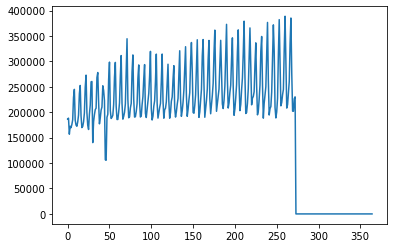

In [16]:
plt.plot(np.sum(pickup_mat[1,:,:], axis = (1)))

In [81]:
# finally, get the data matrix
pickup_mats = []
dropoff_mats = []

for year in range(2018,2022):
    pickup_mats.append(np.load(datadir_chicago+'pickup_mat_'+str(year)+'.npy'))
    dropoff_mats.append(np.load(datadir_chicago+'dropoff_mat_'+str(year)+'.npy'))

chicago_pickup = np.concatenate(pickup_mats, axis = 1)
chicago_dropoff = np.concatenate(dropoff_mats, axis = 1)

chicago_pickup = np.concatenate([chicago_pickup[0,:,:], chicago_pickup[1,:,:],chicago_pickup[2,:,:]], axis = 1)
chicago_dropoff = np.concatenate([chicago_dropoff[0,:,:], chicago_dropoff[1,:,:],chicago_dropoff[2,:,:]], axis = 1)

np.savetxt('chicago_pickup.csv', chicago_pickup, delimiter=',')
np.savetxt('chicago_dropoff.csv', chicago_dropoff, delimiter=',')

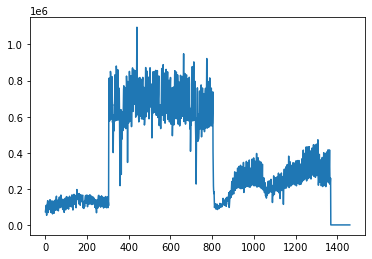

In [84]:
plt.plot(np.sum(chicago_pickup, axis = 1))